In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#%load_ext autoreload
#%autoreload 2

%matplotlib inline


(223648, 32, 32, 3)
(223648, 3072)


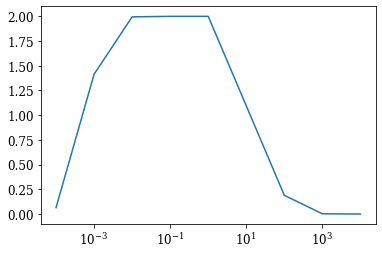

1.4142135


In [3]:
np.random.seed(0)

def rbf_kernel(x, y, s=0.5):
    """ Vectorized Gaussian RBF kernel """
    return np.exp(-((x-y)*(x-y)).sum(axis=1)/(2*s*s))

def mmd_h_(x0, x1, y0, y1, s=0.5):
    """ Implements the one-sample U-statistic from Lemma 6 in A kernel two-sample test"""
    return rbf_kernel(x0, x1, s) + rbf_kernel(y0, y1, s) - rbf_kernel(x0, y1, s) - rbf_kernel(x1, y0, s)

def mmd_lin(x, y, s=0.5):
    """ Linear MMD test statistic """
    N1=x.shape[0]
    N2=y.shape[0]
    if N1==N2:
        #carry on
        n = N1
        n2 = int(n/2)
        x0 = x[:n2,]
        x1 = x[n2:(2*n2),]
        y0 = y[:n2,]
        y1 = y[n2:(2*n2),]
    elif N1>N2:
        # take N2 
        n = N2
        n2 = int(n/2)
        x0 = x[:n2,]
        x1 = x[n2:(2*n2),]
        y0 = y[:n2,]
        y1 = y[n2:(2*n2),]
    else:
        # take N1
        n = N1
        n2 = int(n/2)
        x0 = x[:n2,]
        x1 = x[n2:(2*n2),]
        y0 = y[:n2,]
        y1 = y[n2:(2*n2),]
        
    
    return mmd_h_(x0, x1, y0, y1, s).mean()

from data.tasks import *
x_source,_,x_target,_=load_task(6)


def flatten_images(x):
    N=len(x)
    return x.reshape(N,-1)
print(x_source.shape)
x_source=flatten_images(x_source)
x_target=flatten_images(x_target)
print(x_source.shape)
ms = []
#n = 5000
N = 10#0000
result=[]
sigmas=[1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4]
for sigma in sigmas:
    ms=[]
    for i in range(N):
        ## proxy for randomly selecting datapoints in the mmd linear function
        random.shuffle(x_source)
        random.shuffle(x_target)
        ms.append(mmd_lin(x_source, x_target, sigma))
    result.append(np.mean(ms))
    
    
#plt.hist(ms, bins=20)
plt.semilogx(sigmas,result)
plt.show()

print(np.sqrt(np.max(result)))